In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('Albuquerque Home Prices_data.txt', sep = '\t')
data.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [74]:
data.shape

(117, 7)

In [3]:
data.isna().sum()

PRICE    0
SQFT     0
AGE      0
FEATS    0
NE       0
CUST     0
COR      0
TAX      0
dtype: int64

In [4]:
data = data.replace(-9999, np.nan)

In [5]:
data.isna().sum()

PRICE     0
SQFT      0
AGE      49
FEATS     0
NE        0
CUST      0
COR       0
TAX      10
dtype: int64

- 'PRICE' - ціна, 
- 'SQFT', - площа, кв.фути,
- 'AGE' - вік будинку,
- 'FEATS' - кількість додаткових послуг, максимум 11,
- 'NE' - престижний район, 1 - так, 0 - ні, 
- 'CUST' - тип побудови,
- 'COR' - розміщення на куті, 0 - ні, 1 - так, 
- 'TAX' - податок на власність.

In [6]:
data.shape

(117, 8)

In [7]:
data.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


- Чи впливає ціна на розміщення будинку на куті? COR = 0/1- не на куті/на куті


- $H_0$ - ціна будинку не залежить від розміщення
- $H_1$ - ціна будинку залежить від розміщення

In [8]:
x = data[data['COR'] == 1]['PRICE']
y = data[data['COR'] == 0]['PRICE']

- Перевіряємо на нормальність даних: якщо нормальний, переріяємо гіпотезу про нормальність дисперсій і розраховуємо критерій Стьдента, в зворотьому використовуємо критерій Мана - Уітні

In [9]:
def two_histagrams(x, y):
    x.hist(alpha = 0.5, weights = [1/len(x)]*len(x), color = 'black')
    y.hist(alpha = 0.5, weights = [1/len(y)]*len(y))
    plt.axvline(x.mean(), color = 'red', ls='--')
    plt.axvline(y.mean(), color = 'blue', ls='dashdot')

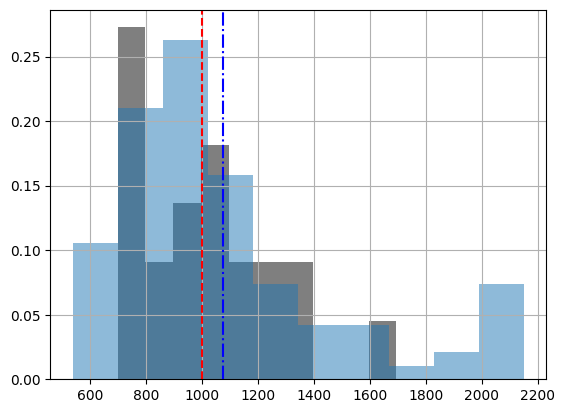

In [10]:
two_histagrams(x, y)

- за побудованою гістаграмою можна сказти, що дані розподілені ненормально, тобто критерій Стьюдента ми відхиляємо і застосовуємо критерій Мана - Уітні. 

In [11]:
def mana(x, y):
    result = scipy.stats.mannwhitneyu(x, y)
    return result

In [12]:
print(mana(x, y))

MannwhitneyuResult(statistic=1009.0, pvalue=0.8044081572425339)


- За отриманим значенням P, яке більше рівня значущості, ми можемо прийняти нульову гіпотезу. Та зробити висновок, що кутове розміщення не впливає на вартість будинку. 

___

* Чи впливає престижність району на вартість будинку?

- $H_0$ - ціна будинку не залежить від розміщення
- $H_1$ - ціна будинку залежить від розміщення

In [13]:
x_ne = data[data['NE']==0]['PRICE']
y_ne = data[data['NE']==1]['PRICE']

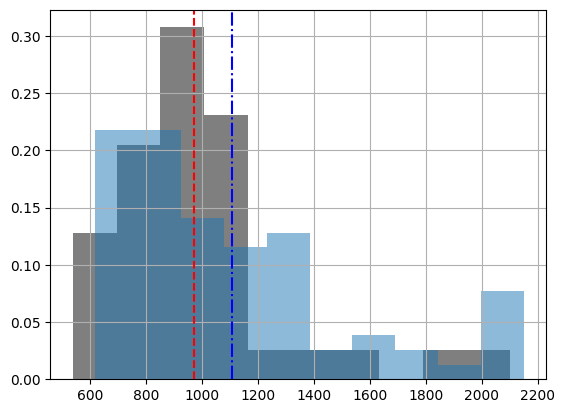

In [14]:
two_histagrams(x_ne, y_ne)

- Розподіл не є нормальним, як і в попередньому прикладі, переходимо до перевірки гіпотез за критерієм Манна - Уітні 

In [15]:
print(mana(x_ne, y_ne))

MannwhitneyuResult(statistic=1240.5, pvalue=0.10544080986815679)


- Приймаємо нульову гіпотезу про те, що розміщення в престижному районі не впливає не ціну. 

* Чи впливає тип побудови на вартість будинку?

- $H_0$ - ціна будинку не залежить від побудови, будинок є стандартним
- $H_1$ - ціна будинку залежить від побудови, будинок є незвичним

In [16]:
x_cust = data[data['CUST']==0]['PRICE']
y_cust = data[data['CUST']==1]['PRICE']

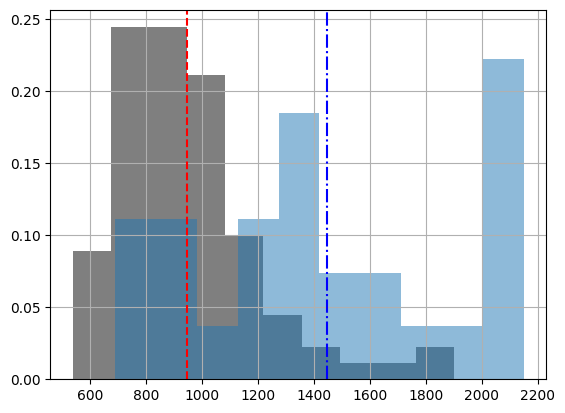

In [17]:
two_histagrams(x_cust, y_cust)

- досить великі викиди, можемо зауважити, що стандартні будинки з першого погляду зазвичай мають нижчу ціну, медіана в межах 700-1000. 

In [18]:
print(mana(x_cust, y_cust))

MannwhitneyuResult(statistic=435.5, pvalue=4.660896169254103e-07)


- За отриманими значеннями, можемо прийняти $H_1$ і зробити висновок, що тип будівлі впливає на ціну

______

- вік будинку має пропущених значень більше ніж 40 %, тому доведеться його видалити

In [19]:
del data['AGE']

(array([ 4., 14., 26., 27., 14.,  8.,  8.,  0.,  2.,  4.]),
 array([ 223. ,  377.2,  531.4,  685.6,  839.8,  994. , 1148.2, 1302.4,
        1456.6, 1610.8, 1765. ]),
 <BarContainer object of 10 artists>)

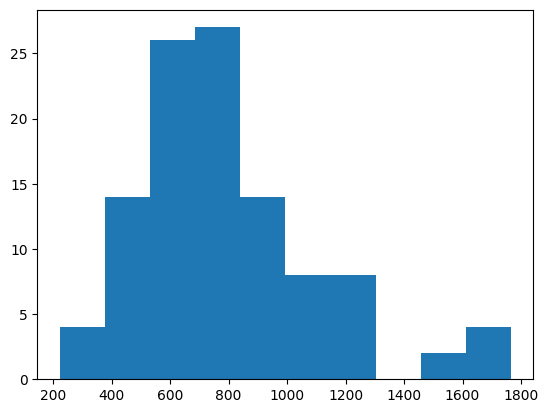

In [20]:
plt.hist(data['TAX'])

- розподіл виглядає приблизно нормальним, тому пропущені значення можем замінити середнім

In [21]:
data['TAX'] =  data['TAX'].fillna(data['TAX'].mean())

In [22]:
data.isna().sum()

PRICE    0
SQFT     0
FEATS    0
NE       0
CUST     0
COR      0
TAX      0
dtype: int64

In [23]:
cor = data.corr()
cor

,PRICE,SQFT,FEATS,NE,CUST,COR,TAX
PRICE,1.000000,0.844795,0.420272,0.167840,0.555292,-0.079293,0.844889
SQFT,0.844795,1.000000,0.394925,0.145030,0.520102,0.040528,0.832674
FEATS,0.420272,0.394925,1.000000,0.190016,0.241964,-0.041547,0.419473
NE,0.167840,0.145030,0.190016,1.000000,0.043033,-0.077336,0.189230
CUST,0.555292,0.520102,0.241964,0.043033,1.000000,-0.003994,0.444906
COR,-0.079293,0.040528,-0.041547,-0.077336,-0.003994,1.000000,-0.058329
TAX,0.844889,0.832674,0.419473,0.189230,0.444906,-0.058329,1.000000


<AxesSubplot: >

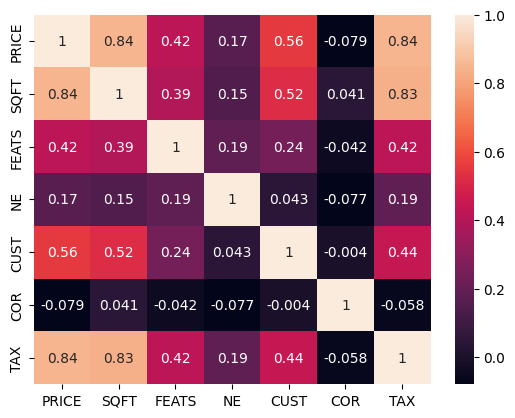

In [25]:
sns.heatmap(cor, annot = True)

In [26]:
x = data.drop('PRICE', axis = 1)

In [27]:
y = data['PRICE']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
predict = model.predict(x_test)

In [32]:
def metrics_result(y_test, y_pred):
    print("R^2 : ", metrics.r2_score(y_test, y_pred) * 100)
    print("MAE :", metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [33]:
metrics_result(y_test, predict)

R^2 :  85.43296905422424
MAE : 106.02902189749275
RMSE: 142.04693620925406


In [34]:
X = sm.add_constant(x)
model_sm = sm.OLS(y, X).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     74.37
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           2.01e-36
Time:                        20:43:00   Log-Likelihood:                -765.84
No. Observations:                 117   AIC:                             1546.
Df Residuals:                     110   BIC:                             1565.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1759     63.308      1.314      0.1

ціна = 83.17 + площа(кв) * 0.29 + дод. * 12.17 + престижність * 8.01 + тип будинку * 133.01 - кутове * 65.8 + податок * 0.54

- $H_0$ - коефіцієнт дорівнює 0, і не впливає на модель
- $H_1$ - коефіцієнт не дорівнює 0 та має вплив на модель

In [35]:
model_sm.pvalues

const    1.916384e-01
SQFT     3.004606e-06
FEATS    3.442001e-01
NE       8.198649e-01
CUST     3.634733e-03
COR      1.186530e-01
TAX      5.954969e-07
dtype: float64

 - лишаємо площу, податок та додаткові зручності

- подивимось чи не корелюють значення між собою

In [36]:
cor = data[['TAX', 'SQFT', 'CUST']].corr()
cor

,TAX,SQFT,CUST
TAX,1.000000,0.832674,0.444906
SQFT,0.832674,1.000000,0.520102
CUST,0.444906,0.520102,1.000000


- податок сильно корельований з площею, тому спробуємо його видалити та побудувати модель тільки на основі двох незалежних параметрів - площі та зручностей

In [37]:
x_new = data[['SQFT', 'CUST']]

In [38]:
x_train_new, x_test_new, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=42)

In [39]:
model_new  = LinearRegression()

In [40]:
model_new.fit(x_train_new, y_train)

LinearRegression()

In [41]:
X_n = sm.add_constant(x_new)
model_sm_new = sm.OLS(y, X_n).fit()
print(model_sm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           2.48e-33
Time:                        20:43:18   Log-Likelihood:                -783.60
No. Observations:                 117   AIC:                             1573.
Df Residuals:                     114   BIC:                             1581.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.1348     65.499      1.743      0.0

In [42]:
predict_new = model_new.predict(x_test_new)

In [43]:
metrics_result(y_test, predict_new)

R^2 :  79.65482047807262
MAE : 123.35543389236067
RMSE: 167.87155474631783


<AxesSubplot: title={'center': '2 features, R-squared: 0.732'}, xlabel='PRICE'>

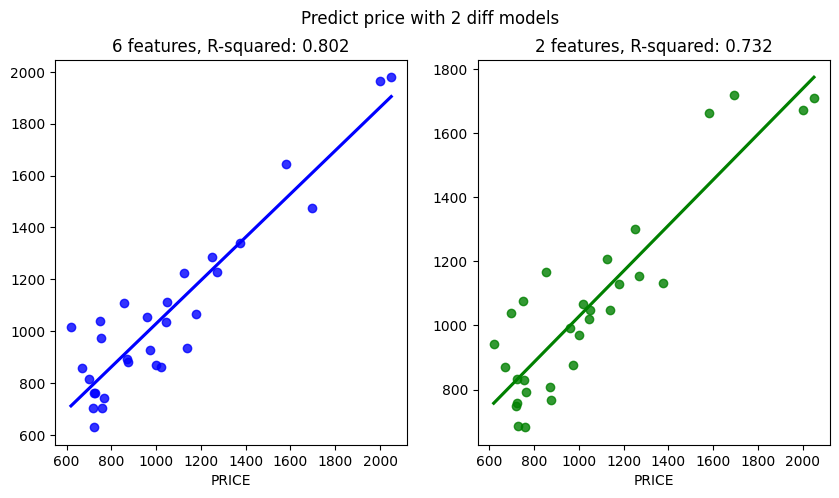

In [44]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Predict price with 2 diff models')
axes[0].set_title('6 features, R-squared: 0.802')
axes[1].set_title('2 features, R-squared: 0.732')
sns.regplot(ax=axes[0], x=y_test, y=predict, data = data, ci=None, color="b")
sns.regplot(ax=axes[1], x=y_test, y=predict_new, data = data, ci=None, color="g")

In [46]:
xgb = GradientBoostingRegressor()

In [53]:
xgb.fit(x_train_new, y_train)

GradientBoostingRegressor()

In [54]:
xgb_pred = xgb.predict(x_test_new)

In [55]:
metrics_result(y_test, xgb_pred)

R^2 :  76.87349280596496
MAE : 137.7320221682151
RMSE: 178.97870957902614


In [67]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [68]:
min_rmse = min(rmse_val)
k_best = rmse_val.index(min_rmse)

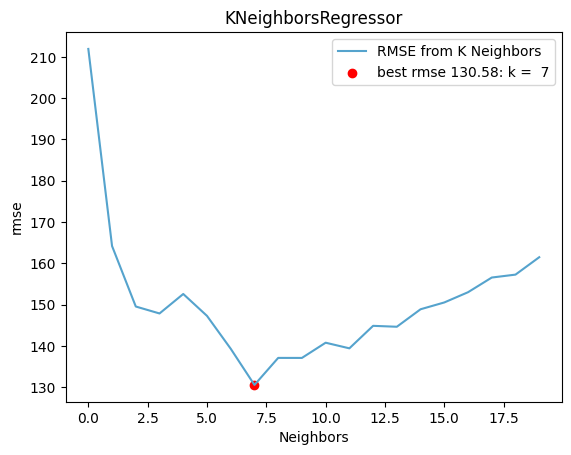

In [69]:
plt.title(f"KNeighborsRegressor")
plt.xlabel('Neighbors')
plt.ylabel('rmse')
sns.set_palette("icefire")
plt.plot(range(20), rmse_val, label = 'RMSE from K Neighbors')
plt.scatter(k_best, min_rmse, color = 'red', label = f'best rmse {min_rmse.round(2)}: k =  {k_best}')
plt.legend()
plt.show()

In [62]:
neigh = KNeighborsRegressor(n_neighbors = 7)

In [70]:
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [71]:
k_neigb = neigh.predict(x_test)

In [72]:
metrics_result(y_test, k_neigb)

R^2 :  85.9839453979107
MAE : 100.82380952380956
RMSE: 139.33468492004675


In [75]:
forest = RandomForestRegressor()

In [76]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [77]:
forest_pred = forest.predict(x_test)

In [78]:
metrics_result(y_test, forest_pred)

R^2 :  82.87913734014305
MAE : 109.17433333333332
RMSE: 153.99590458840132
